DEVILDER Alice
KUMAR Akshita
FADLI Nazim
LECLERC Marceau

# Analysis of Numerical Methods to Solve ODEs 
## [**Carbon Cycle project**](https://exchange.iseesystems.com/public/globeprogam/global-carbon-cycle-model-with-feedbacks/index.html) 

(a link to the model used in the project)


### Import librairies and functions from *carbone.py*

In [1]:
import numpy as np
from carbone import *
import matplotlib.pyplot as plt
from time import time

### Extra functions

Define a timer decorator to evaluate time efficiency :


In [2]:
def timer(func): 
    def wrap_func(*args, **kwargs): 
        t1 = time() 
        result = func(*args, **kwargs) 
        t2 = time() 
        print(f'execution time : {t2-t1}s') 
        return result 
    return wrap_func

Define a function to plot the results with the following labels and colors:

In [3]:
labels = ['Atmosphere', 'CarbonateRock', 'DeepOcean', 'FossilFuel', 'Plant',
               'Soil', 'SurfaceOcean', 'VegLandArea_percent']
colors = ['b', 'skyblue', 'pink', 'r', 'g', 'orange', 'y', 'darkgreen']


In [4]:
def plots(points, ys, same_axes = True, save = False, name = '',title=''):
    if not same_axes:
        fig, ax = plt.subplots(4,2, figsize = (7, 7), dpi = 200)
        for j in range(len(x0)):
            ax[j % 4, j // 4].plot(points, ys[j], label = labels[j],c = colors[j])
            ax.set_xlabel('Year')
            ax[j % 4, j // 4].legend()
    else:
        fig, ax0 = plt.subplots(figsize = (9, 7), dpi = 200)
        ax0.plot(points, ys[0], label = labels[0], c = colors[0])
        ax0.set_xlabel('Year')
        ax0.tick_params(axis='y', labelcolor=colors[0])
        ax1, ax2 , ax3, ax4, ax5, ax6, ax7 = ax0.twinx(), ax0.twinx(), ax0.twinx(), ax0.twinx(), ax0.twinx(), ax0.twinx(), ax0.twinx()
        for i, ax in enumerate([ax1, ax2 , ax3, ax4, ax5, ax6, ax7]):
            ax.plot(points, ys[i + 1], label = labels[i + 1],
                                  c = colors[i + 1])
            ax.tick_params(axis='y', labelcolor=colors[i + 1])
            ax.spines['right'].set_position(('outward', i * 40))

    plt.title(title)
            
    if save:
        plt.savefig(name)
    plt.show()

## Implementation
### **1. Euler's method  (RK method of order 1)**

We have that the forward difference approximation (we can also define backward difference approximation) : $x'(t)$ $\approx \frac{x(t+h) - x(t)}{h}$ 

Then if we have a Cauchy problem: $\frac{{dx}}{{dt}} = f(t, x)$ with initial condition $x(t_0) = x_0$ 

denoting $z$ the solution of the Cauchy problem

The differential equation can thus be approximated using forward differences by: 
$$
 f(t_i,x_i) = \frac{x_{i+1} - x_i}{t_{i+1}-t_i} \approx z'(t_i)
$$


Then  the value at the next time step can be approximated by the current value plus the change in time multiplied by the function's rate of change at the current time.

which gives the explicit Euler formula: $$ x_{i+1} = x_i + (t_{i+1}-t_i) f(t_i,x_i) \approx z_{i+1} $$

Because by Taylor expansion we have : $$ z_{i+1} \approx z_i + (t_{i+1}-t_i) f(t_i,z_i)  $$









In [5]:
# We add this annotation to the function to measure the execution time
#@timer
def euler(df, points, init):
    n = len(points)
    d = len(init)
    y = np.zeros((d, n))
    y[:, 0] = init
    for i, point in enumerate(points[:-1]):
        h = points[i + 1] - points[i]
        y[:, i + 1] = y[:, i] +  h * df(y[:, i], points[i])
    return y

In the ```FossFuelData```, we noticed that we had data for the years from 1850 to 2100 hence to solve our ODE and plot the result, we took 5000 points from 1850 to 2600.
Let's have a look :

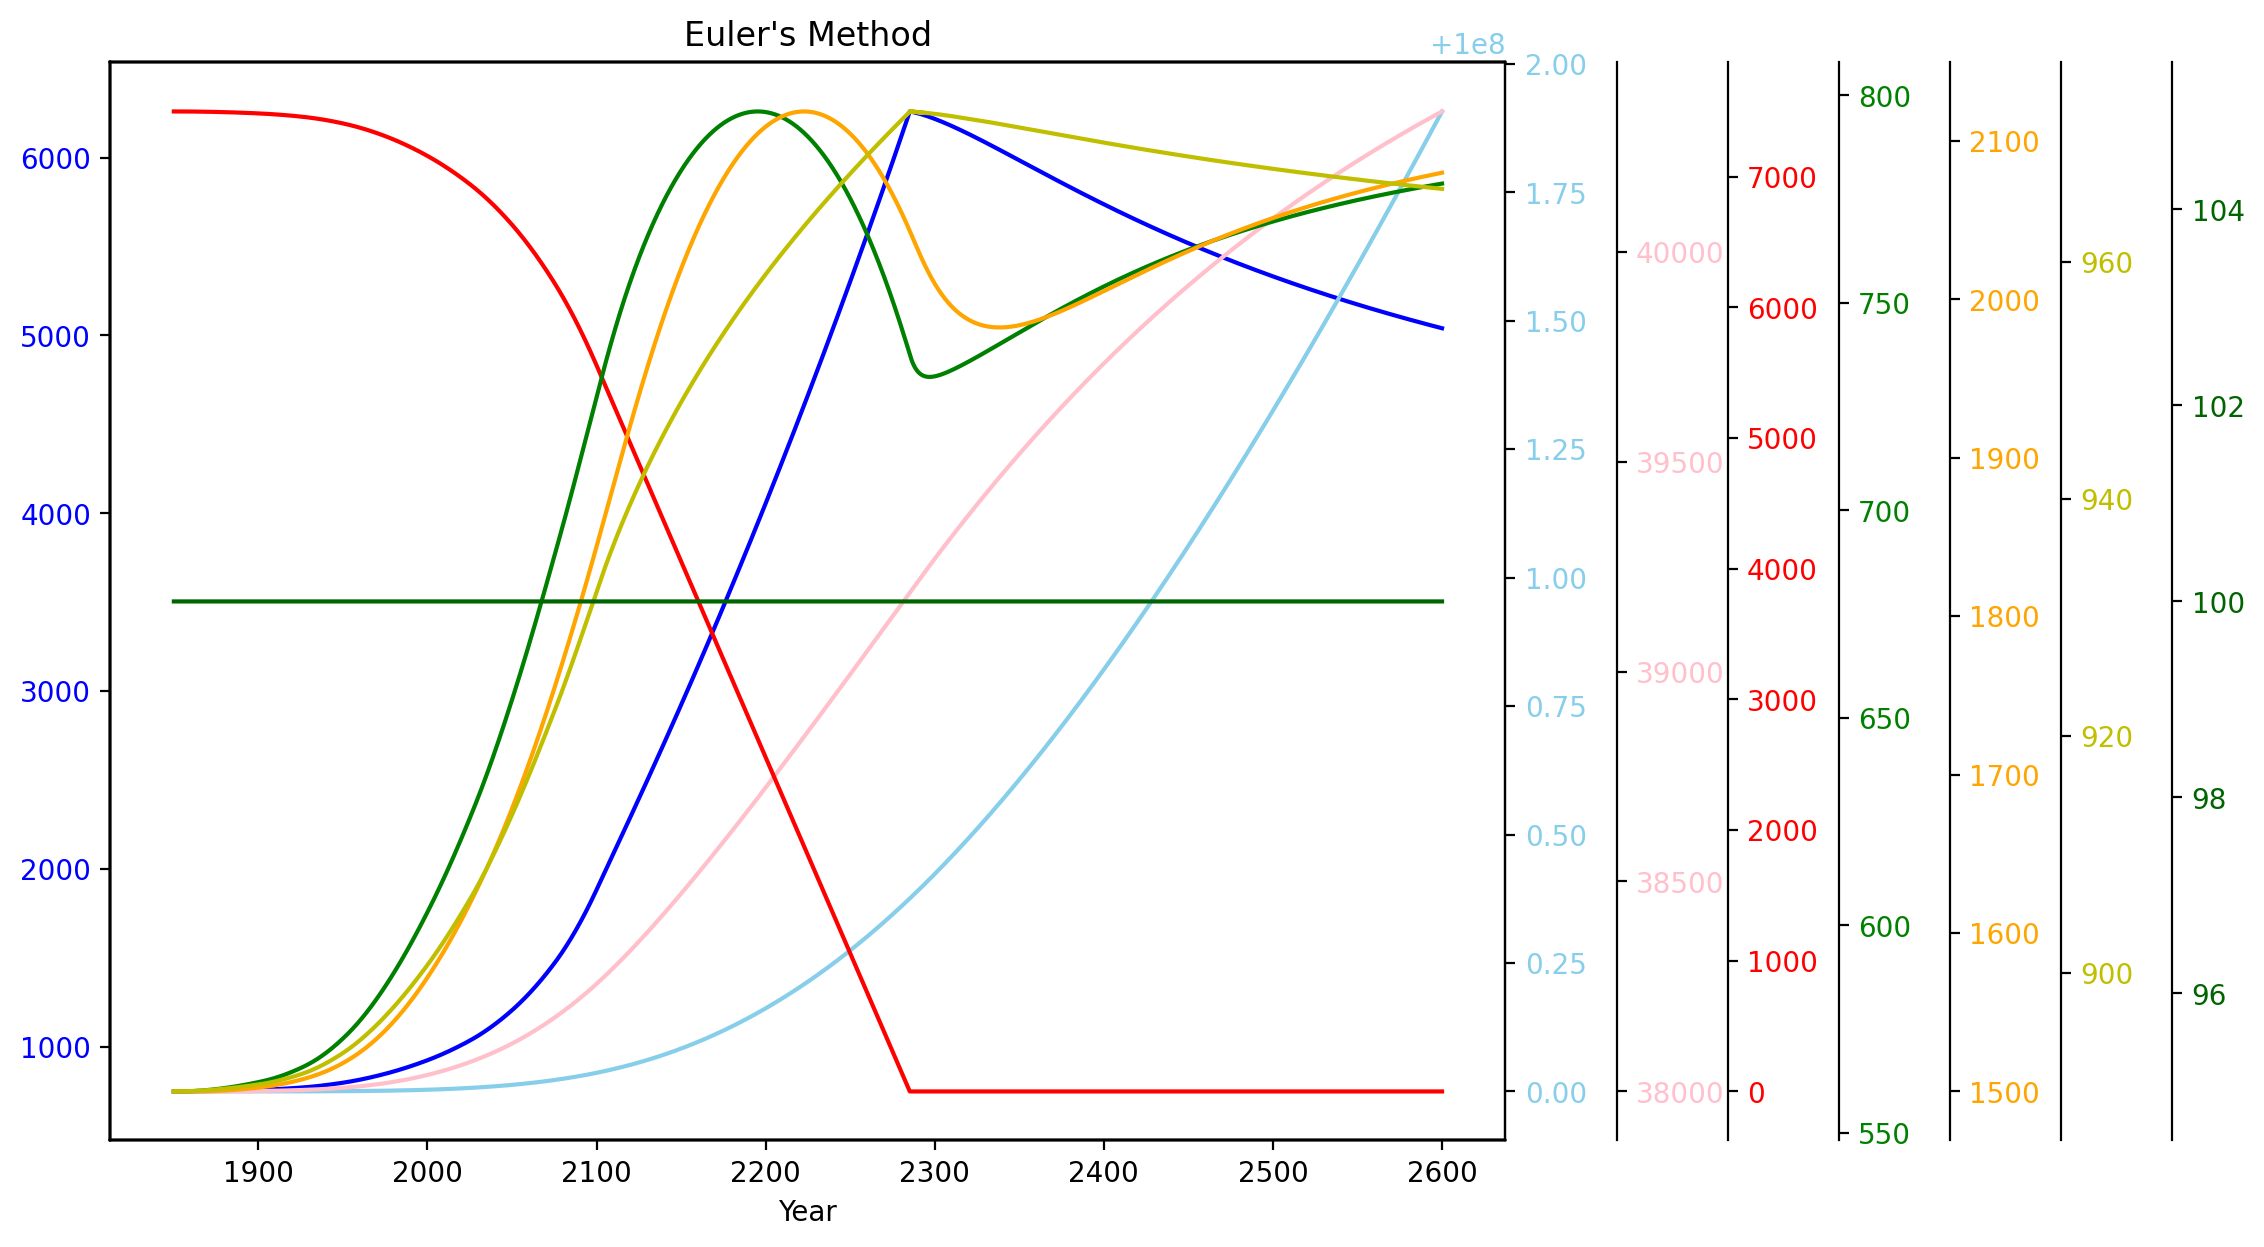

In [6]:
points = np.linspace(1850, 2600, 5000)
y_euler = euler(derivative, points, x0)

plots(points, y_euler, True, True, 'Euler_5Kpoints',"Euler's Method")

### Observations
We have noticed that many points were needed with this method to obtain a good result, that is exactly what we observed with the simulator. Otherwise, we would observe divengence phenomenon.  
The execution time of this method is quite fast!

### **2. Runge Kutta with q = 4, method of order 4 (classical implementation)**


At each time step, the method calculates several intermediate function values based on different slope estimates (by evaluating the derivative function at different points within the time interval). These intermediate values are then used to compute a weighted average, which is used to update the function value at the next time step (so that we get a more accurate approximation). And then we repeat the procedure.

The idea behind is to match terms of the Taylor expansion of the solution of the ordinary differential equation (ODE) at a higher order, for Euler's method we only match the first-order term of the Taylor expansion.

In [7]:
# We add this annotation to the function to measure the execution time
#@timer
def RungeKuttaq4(df, points, init):
    n = len(points)
    d = len(init)
    y = np.zeros((d, n))
    y[:, 0] = init
    for i, point in enumerate(points[:-1]):
        h = points[i + 1] - points[i]
        p1 = df(y[:, i], points[i])
        p2 = df(y[:, i] + p1 * h / 2, points[i] + h / 2)
        p3 = df(y[:, i] + p2 * h / 2, points[i] + h / 2)
        p4 = df(y[:, i] + p3 * h, points[i] + h)
        y[:, i + 1] = y[:, i] + (p1 + 2 * p2 + 2 * p3 + p4) * h / 6
    return y

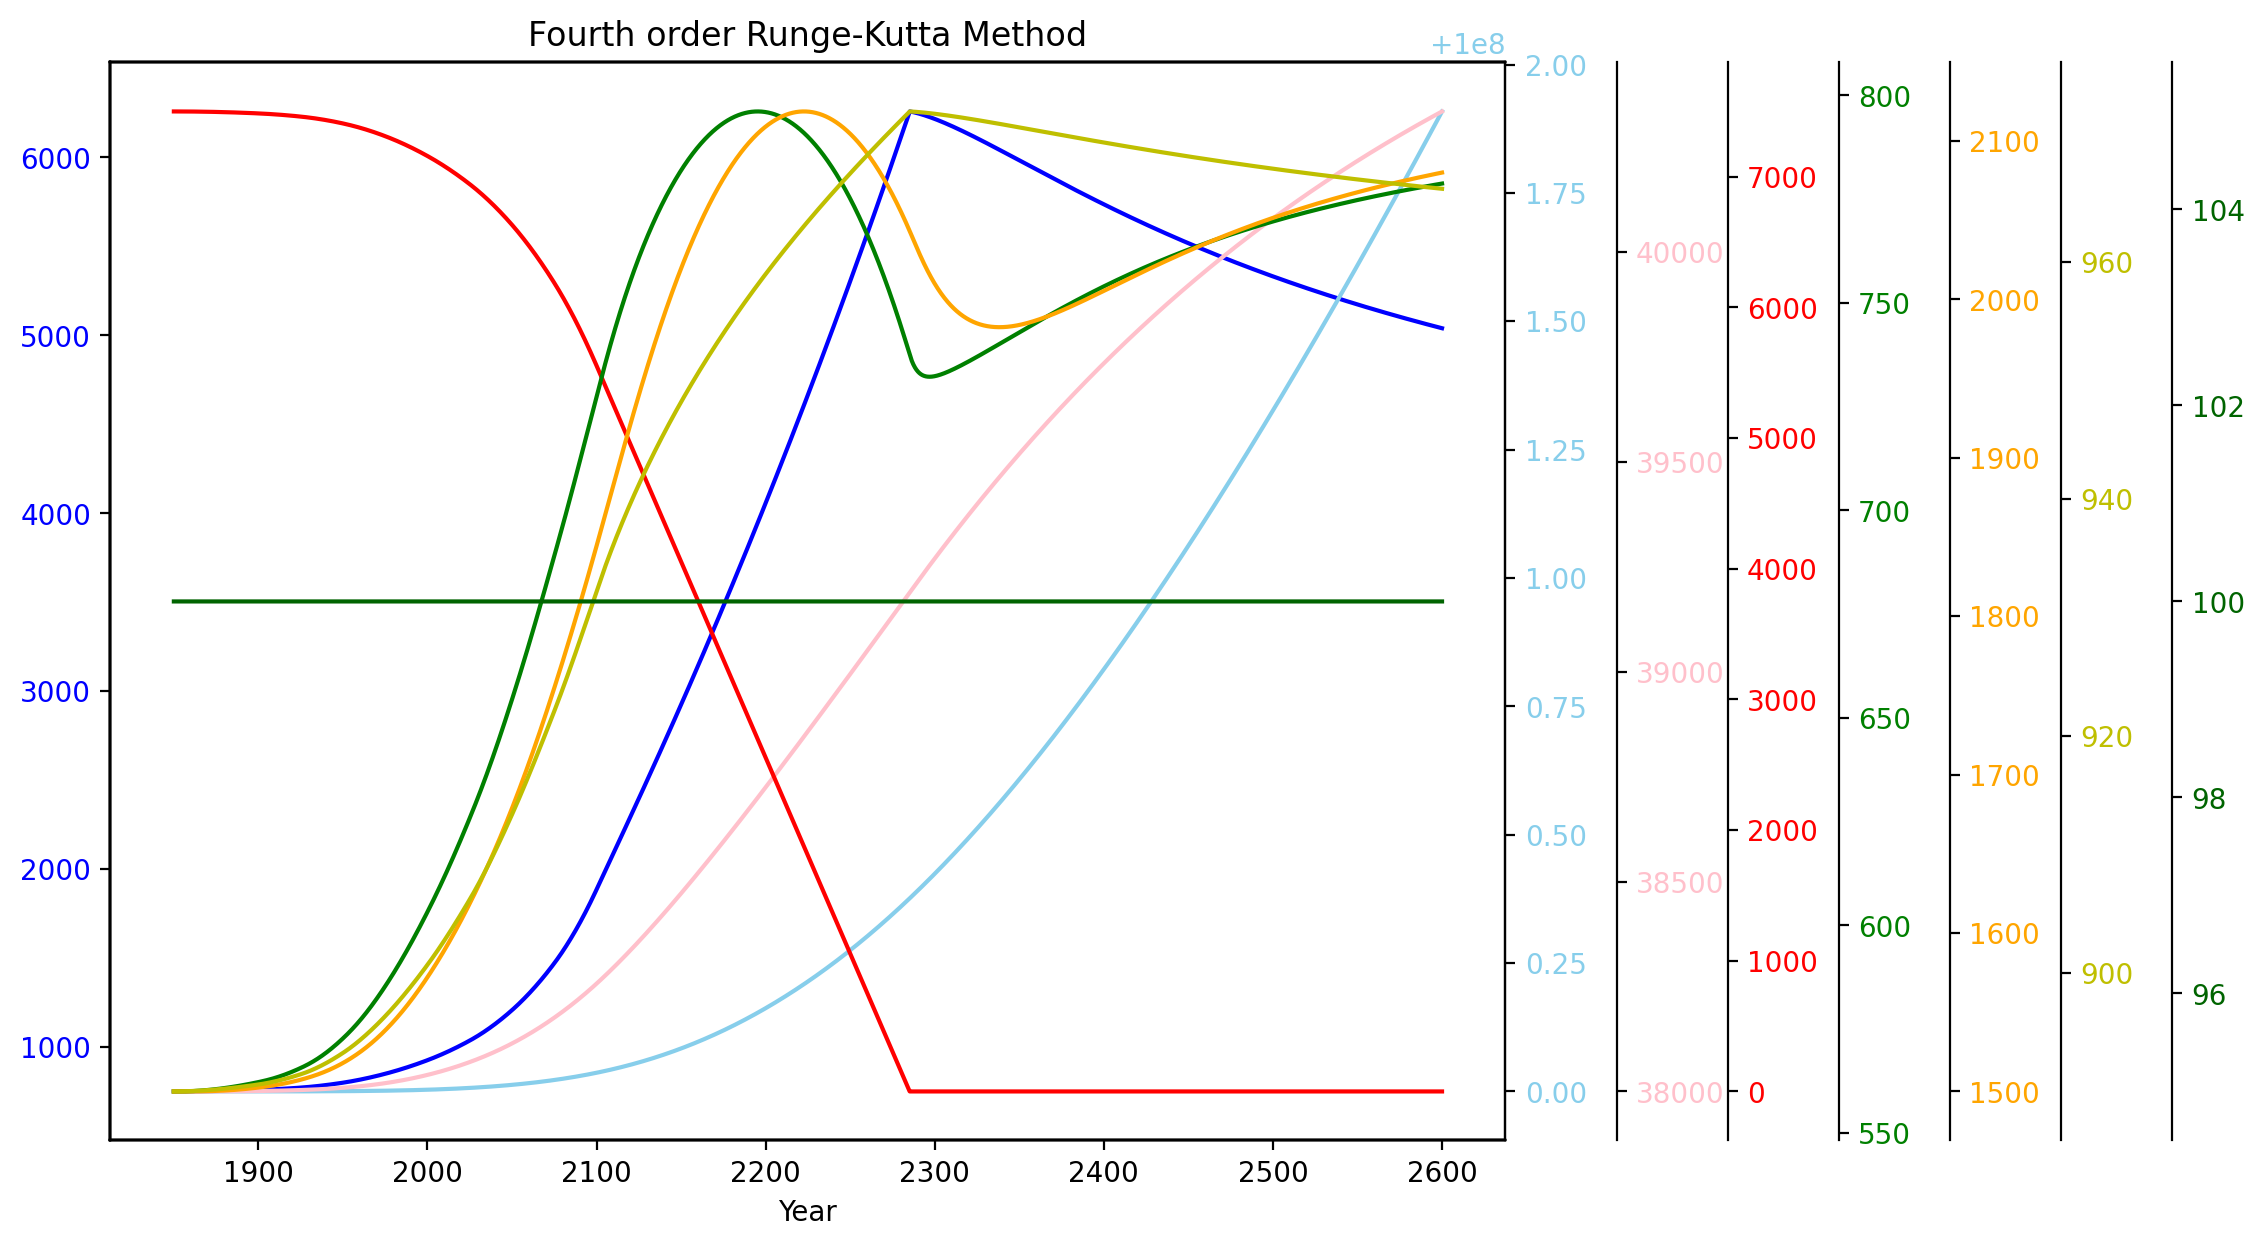

In [8]:
y_RK = RungeKuttaq4(derivative, points, x0)
plots(points, y_RK, True, True, "RK4_5Kpoints","Fourth order Runge-Kutta Method")

### Observations

Understandably, for the same number of points, the Runge-Kutta method takes longer than Euler's method (more operations are done for the same amount of loops), execution time for Runge-Kutta method VS Euler's method for 5Kpoints : 0.324s > 0.090s.

We can also see that with less points Runge-Kutta method gives a better approximation then Euler's method.
And we can see that if we do not have enough points both methods do not converge (see below).

### Comparing Euler's Method and RK Method:


We have already seen that the execution time of RK method is much longer. We now try reducing the number of points and compare the effects on the convergence of both the methods.

In [9]:
points = np.linspace(1850, 2600, 3500)
print("For Euler's method with",len(points),"points, ",end="")
y_euler = euler(derivative, points, x0)
print("For Runge-Kutta method with",len(points),"points, ",end="")
y_RK = RungeKuttaq4(derivative, points, x0)

For Euler's method with 3500 points, For Runge-Kutta method with 3500 points, 

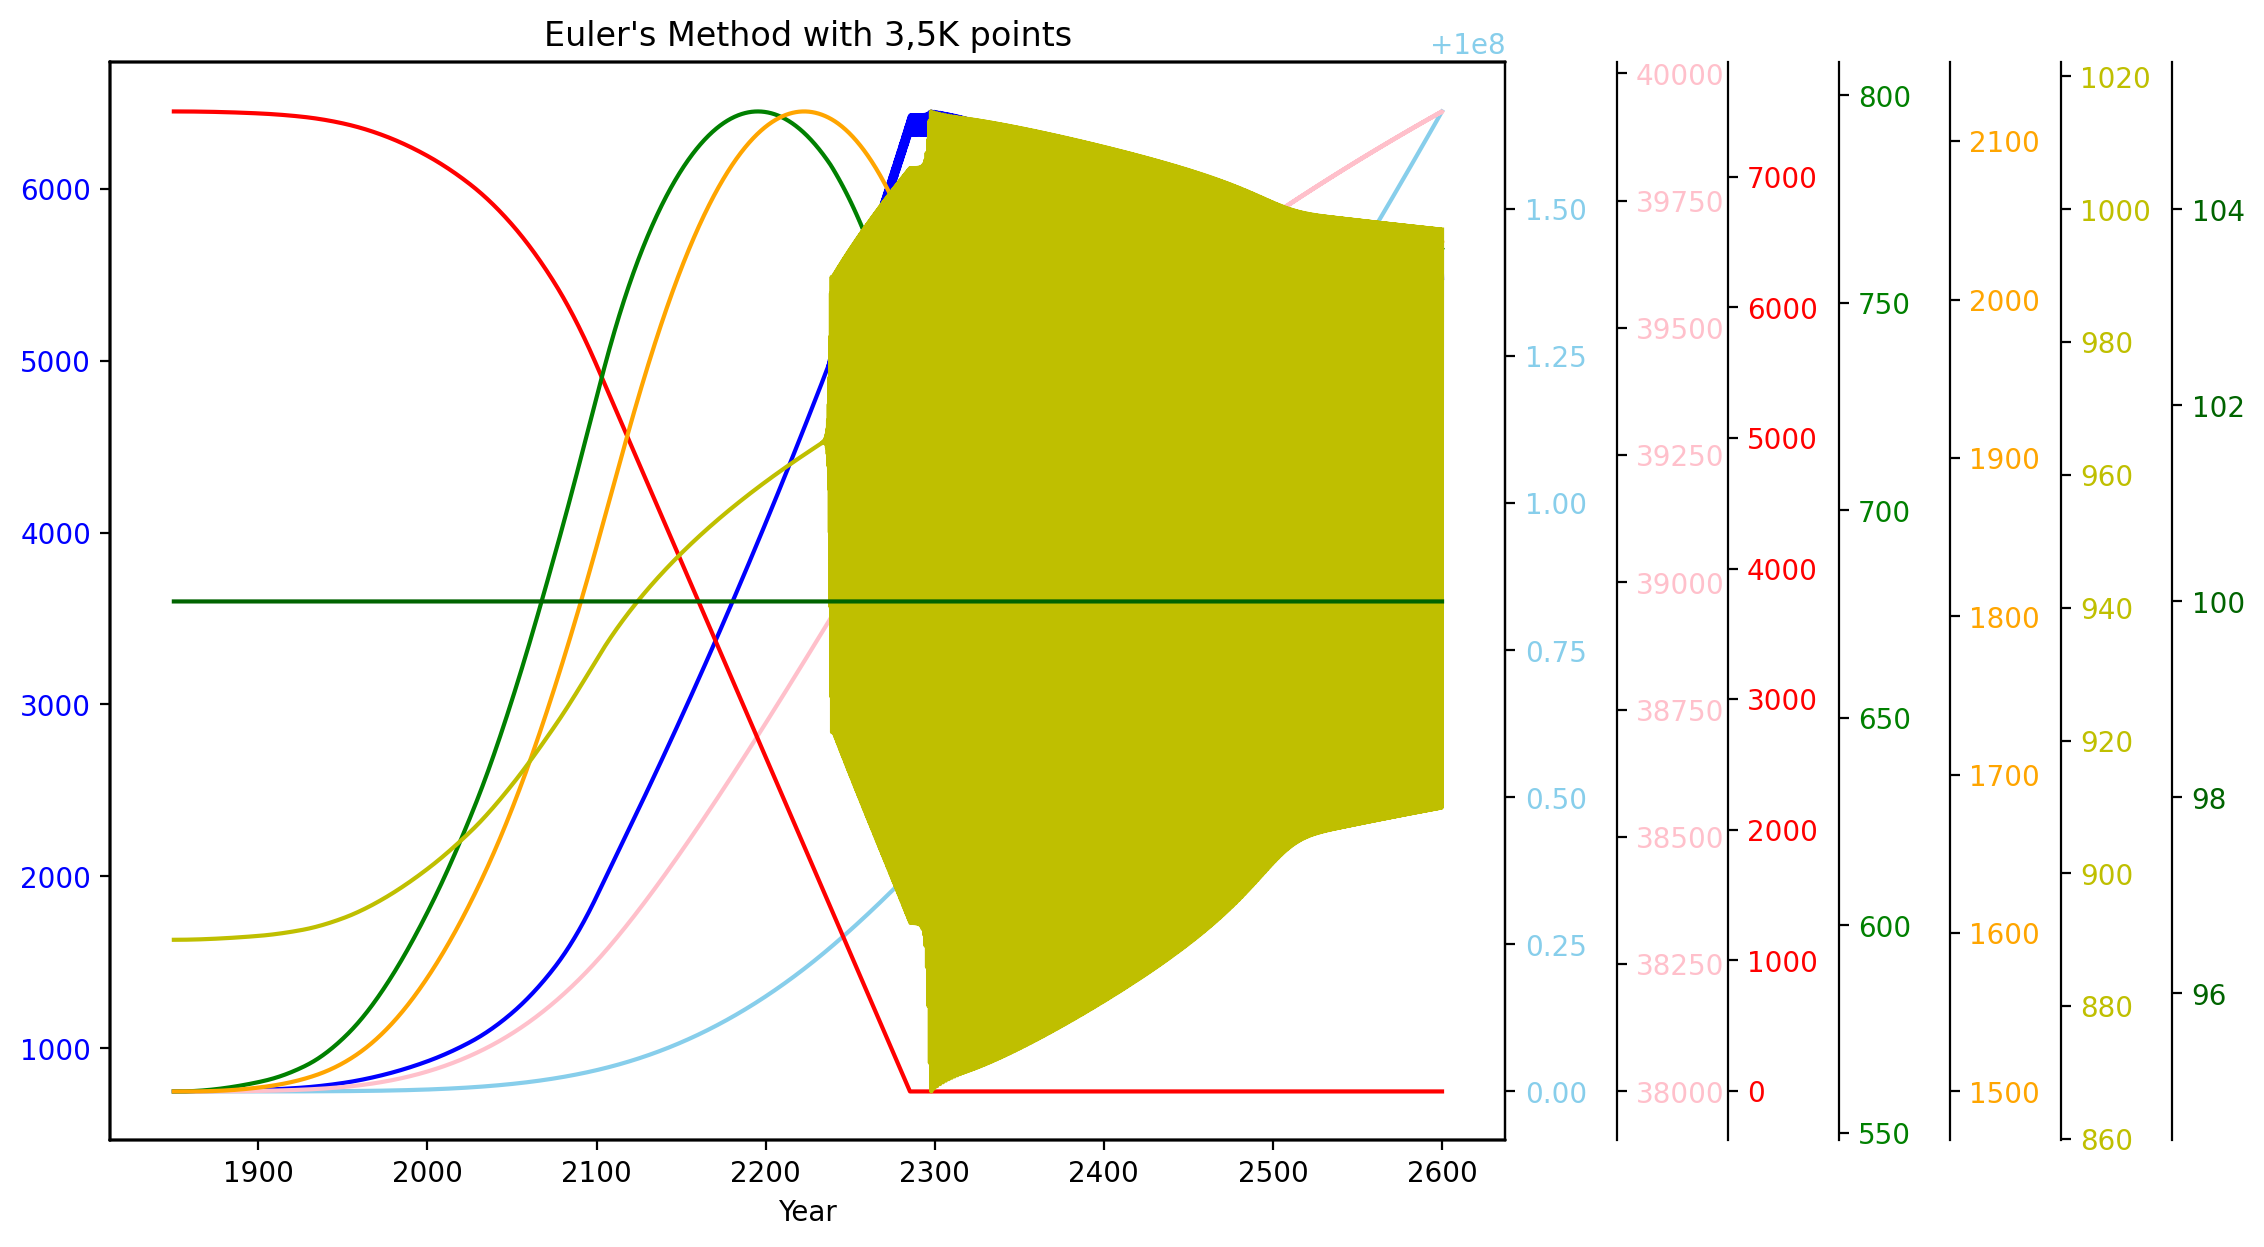

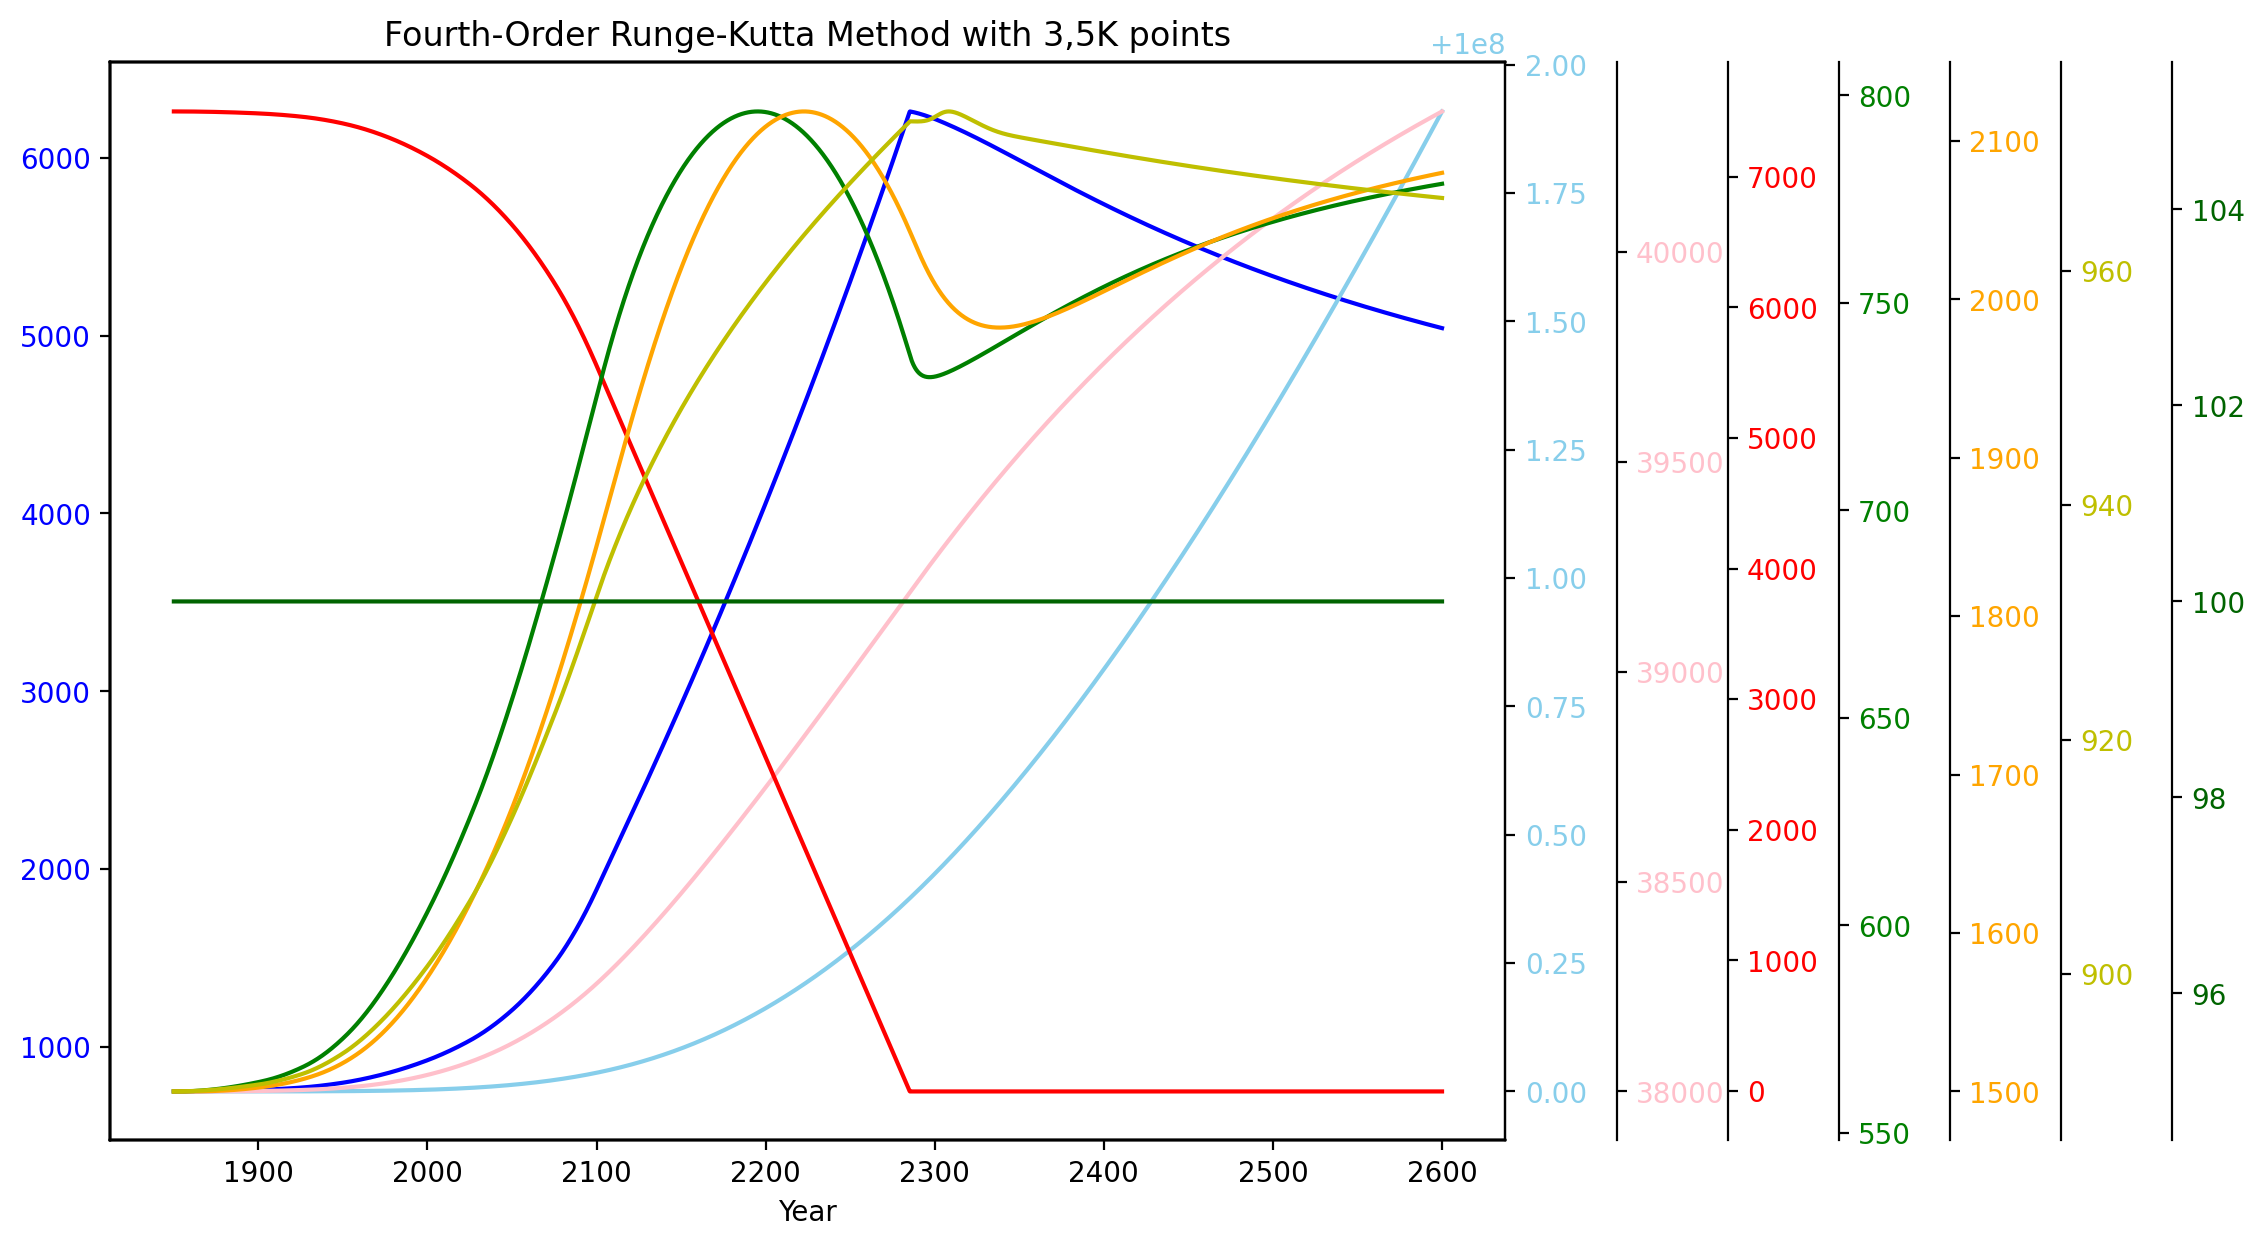

In [10]:
plots(points, y_euler, True, True, "euler_3,5K","Euler's Method with 3,5K points")
plots(points, y_RK, True, True, "RK4_3,5K","Fourth-Order Runge-Kutta Method with 3,5K points")

As we can see, the Euler's method does not converge in this case but the RK method does. Hence, the Euler's method requires much more points (and smaller step size than R-K method) to converge.

In [11]:
points = np.linspace(1850, 2600, 3500)
print("For Euler's method with",len(points),"points, ",end="")
y_euler = euler(derivative, points, x0)
print("For Runge-Kutta method with",len(points),"points, ",end="")
y_RK = RungeKuttaq4(derivative, points, x0)

For Euler's method with 3500 points, For Runge-Kutta method with 3500 points, 

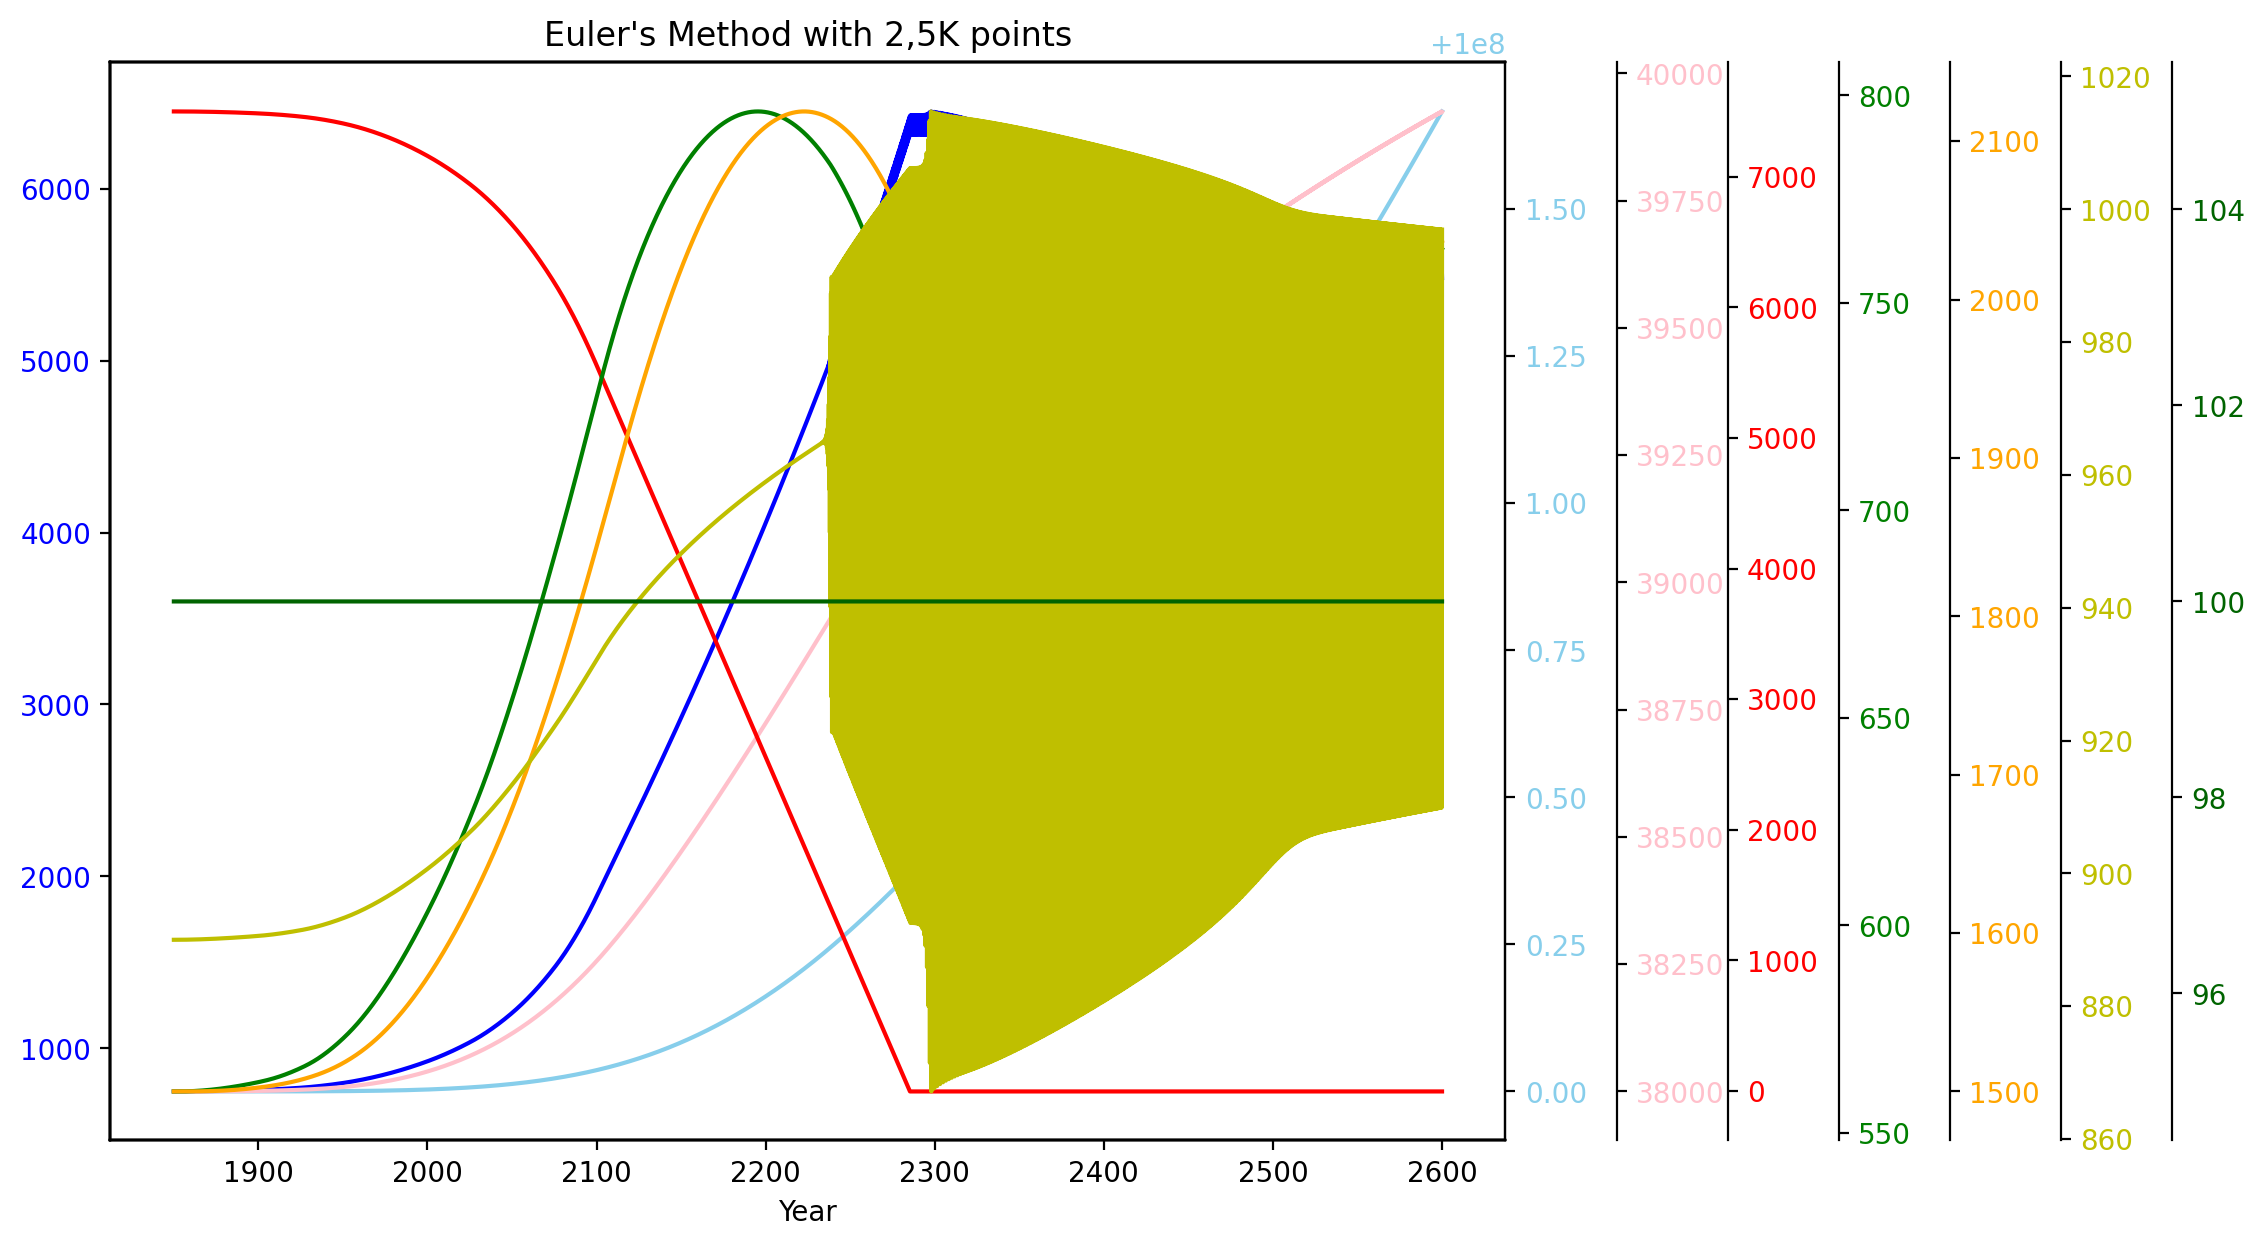

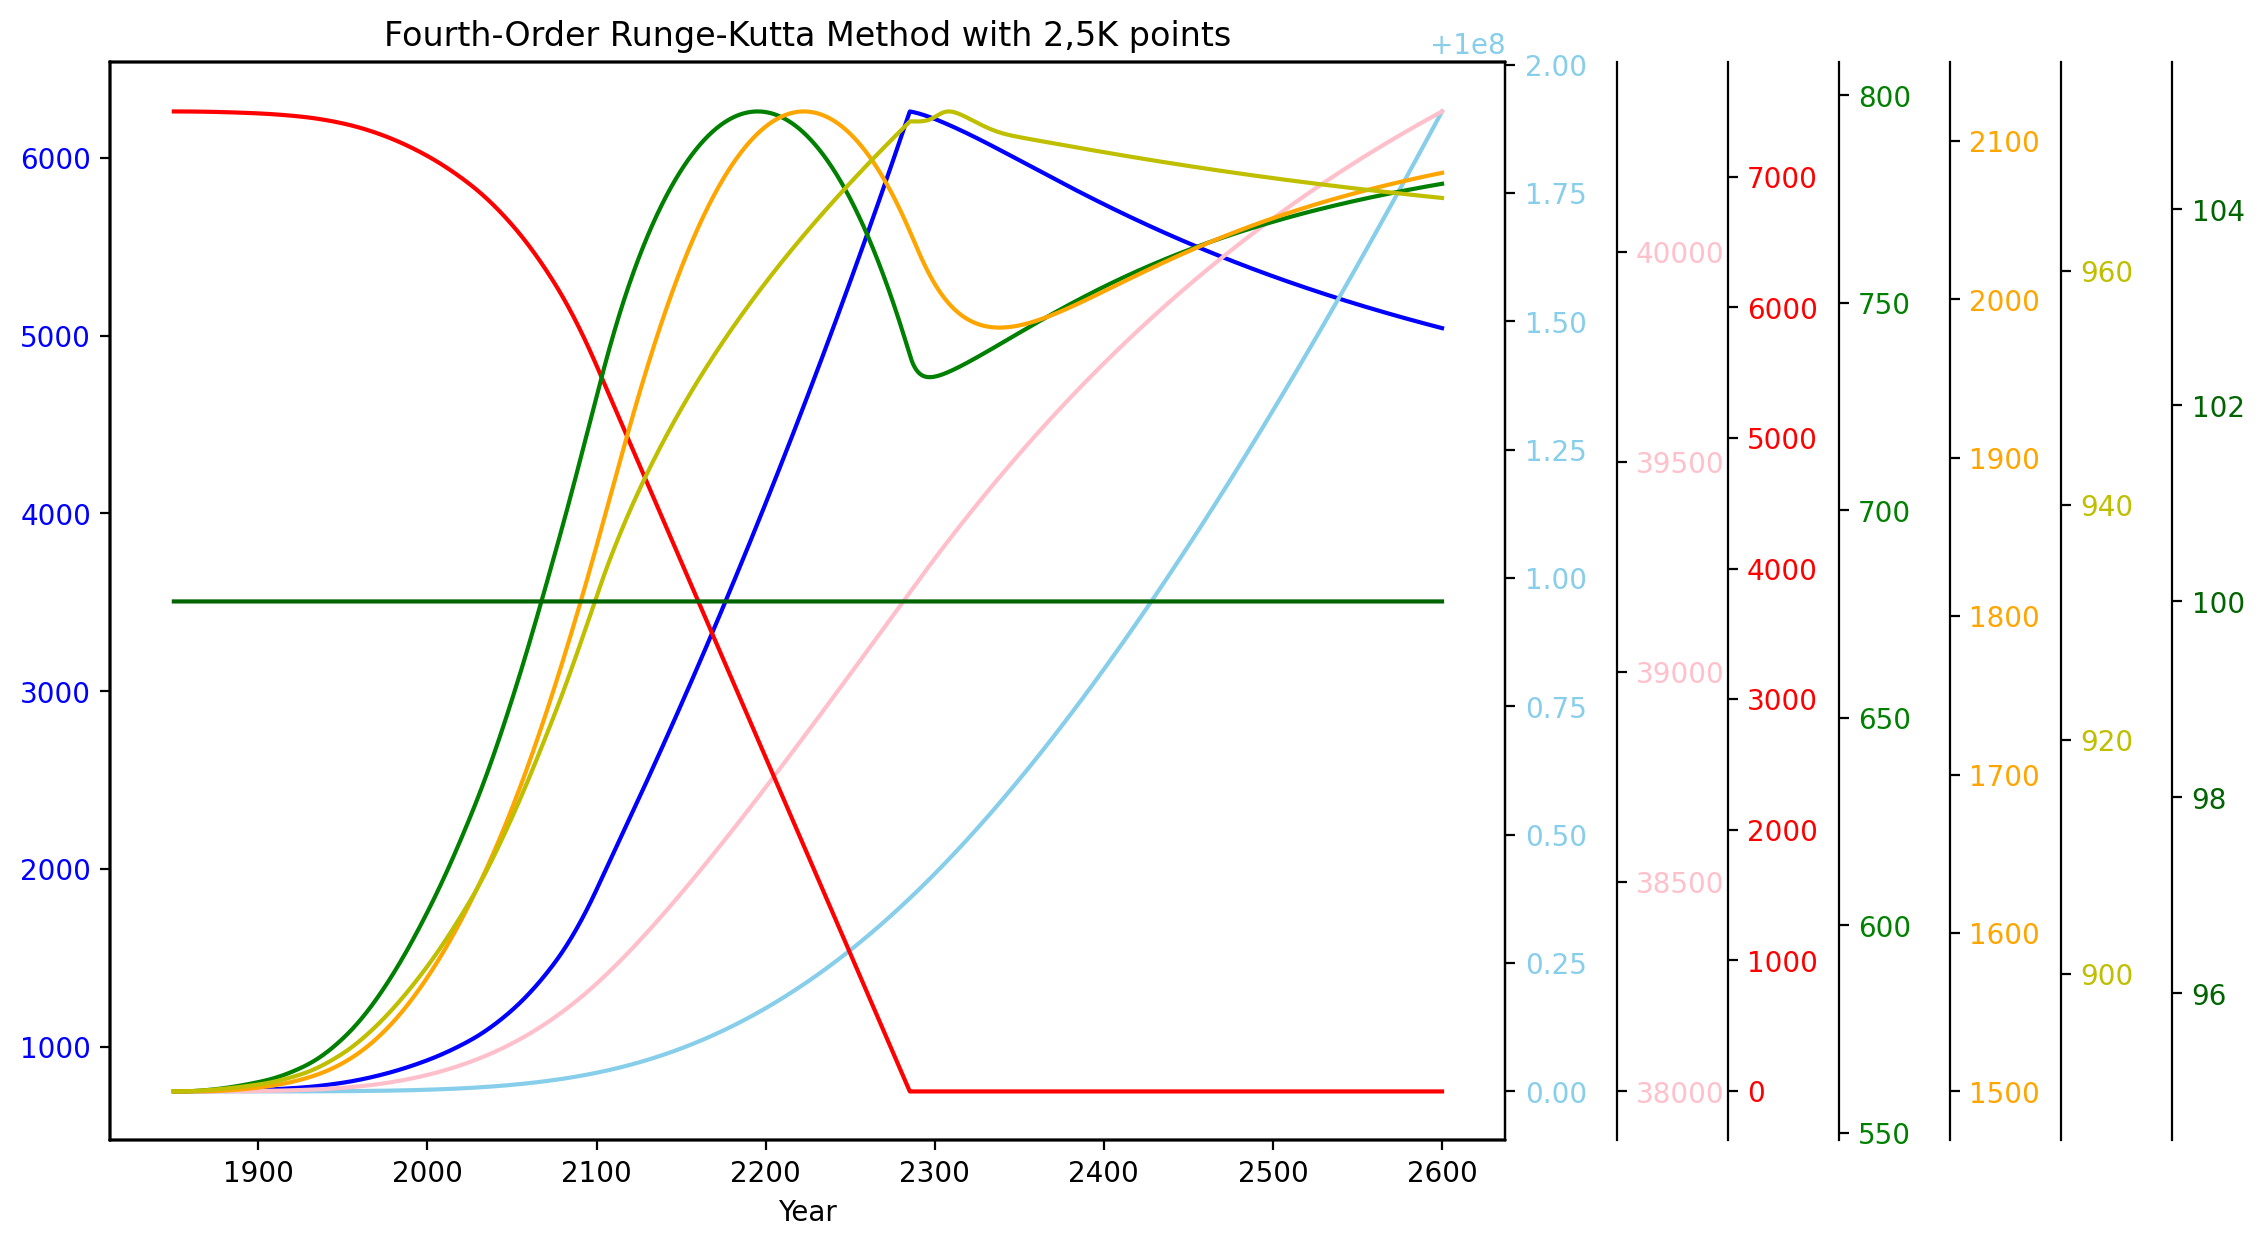

In [12]:
plots(points, y_euler, True, True, "euler_2,5K","Euler's Method with 2,5K points")
plots(points, y_RK, True, True, "RK4_2,5K","Fourth-Order Runge-Kutta Method with 2,5K points")

We see that in this case both the methods do not converge as the number of points is reduced even further, i.e the step size is too large.

### **3. Bogacki-Shampine method**
Case of "adaptative RK methods", [see here](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Adaptive_Runge%E2%80%93Kutta_methods).



Instead of using a fixed step size $ℎ$, we will adapt the step size at each step by using two Runge-Kutta methods, one method with order $a$, and the other method with order $a+1$, such that we have an approximation of the solution an approximation alongside its corresponding higher-order approximation. Then we will compute an estimation of the local error for the lowest order approximation, and we will adapt the step size by using an approximation of the error we have for one-step methods:
$$
E_i(h) \approx C h^{a+1}
$$

And considering a regularization factor $q$ :
$$
E_i(qh) \approx C q^{a+1} h^{a+1}
$$

Such that we have: 
$$
E_i(qh) \approx \varepsilon
$$
So we can get an approximation:
$$
q \approx (\frac{\varepsilon}{E_i})^{\frac{1}{a+1}}
$$



In [13]:
# implementation of the Bogacki-Shampine method
#@timer
def BogackiShampine(df, points, init, tol):
    error = [0]
    n = len(points)
    d = len(init)
    y = np.zeros((d, n))
    y[:, 0] = init
    t = points[0]
    times = [t]  # List to store time values we will use it to plot the results
    i = 0 
    h = (points[-1] - points[0]) / (n - 1)  # Initial step size we don't need to worry about it we will adjust it latter on depending on the error
                                            # we will adjust it latter on depending on the error
    # Initialize intermediate variables for approximation and error estimation
    x = np.zeros_like(y[:, i])
    z = np.zeros_like(y[:, i])

    while t < points[-1]:
        # Detect underflow of the step size (h -> 0) 
        if t + h == t:
            print("Stepsize too small near the time =", t)
            break

        # Compute the intermediate points using Bogacki-Shampine method
        p1 = df(y[:, i], t)
        p2 = df(y[:, i] + h * p1 / 2, t + h / 2)
        p3 = df(y[:, i] + 3 * h * p2 / 4, t + 3 * h / 4)
        x = y[:, i] + (2 * p1 + 3 * p2 + 4 * p3) * h / 9 #third-order approximation to the solution

        # Compute the solution using a higher order method
        p4 = df(x, t + h)
        z = y[:, i] + (p1 * (7 / 24) + p2 * (1 / 4) + p3 * (1 / 3) + p4 * (1 / 8)) * h # second-order approximation to the solution

        # Estimate error 
        E = np.linalg.norm(z - x, np.inf) # second-order approximation - third-order approximation
        

        # Accept the step if error is within tolerance
        if E < tol:
            i += 1
            t += h
            error.append(E)
            times.append(t)  # we append the time value to the list, because the error is within the tolerance
            y[:, i] = x # we append the second-order approximation to the solution eventhough we have a third-order approximation 
                        # because the lower order approximation serves as a base for the error estimation
        

        # Update step size
        epsilon = np.finfo(float).eps  # Machine epsilon to avoid zero division
        q = 0.8 * ((tol + epsilon) / (E + epsilon)) ** (1 / 3)  # Conservative optimal step factor, we are using a power of 1/3 because we are using a second-order approximation
        q = min(q, 2)  # Limit step size growth
        h = min(q *h, points[-1] - t) # Update step size with respect to the error
                                      # check if the new step size is not greater than the final time point

    return times, y[:, :i+1],error


In [14]:
points = np.linspace(1850, 2600, 5000)
times,y_BogackiShampine,error = BogackiShampine(derivative, points, x0, 1e-4)

whit this approche we can conrol the estimate error 

Text(0.5, 1.0, 'Estimate-error over time')

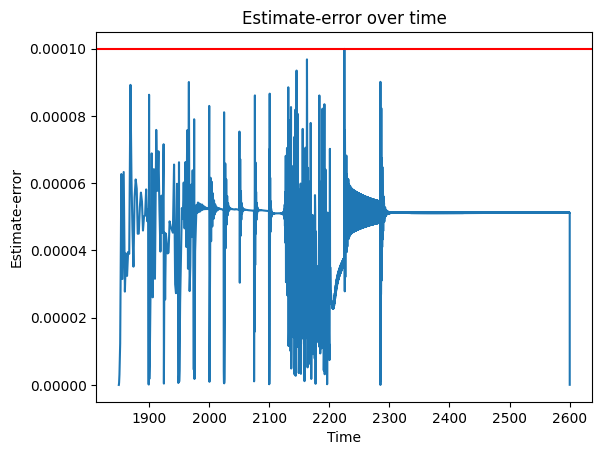

In [15]:
plt.plot(times, error)
plt.axhline(y=1e-4, color='r', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Estimate-error')
plt.title('Estimate-error over time')

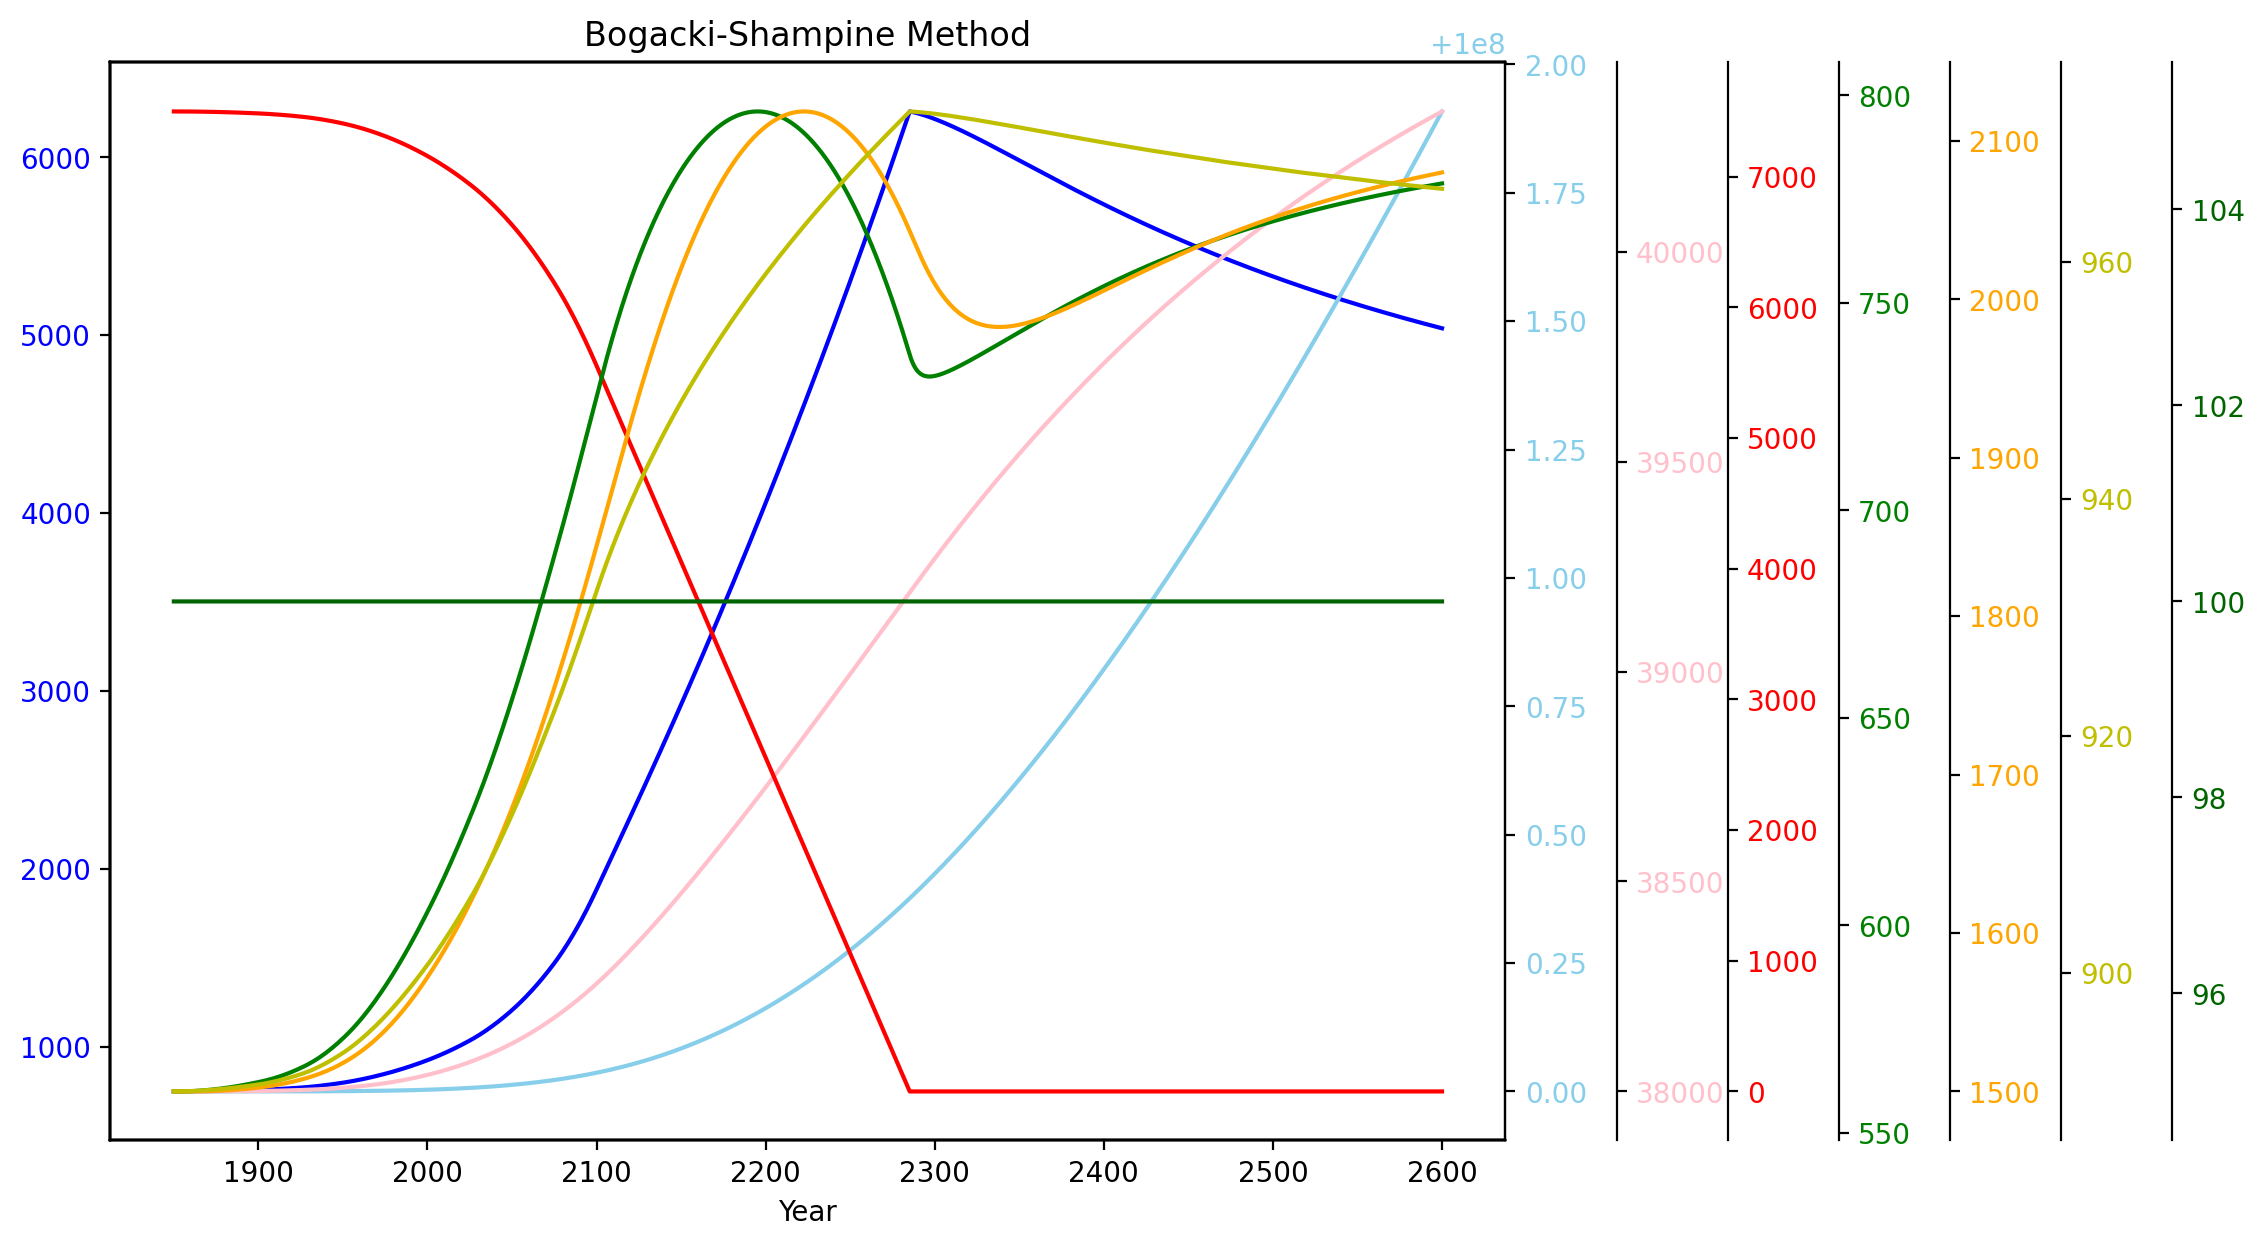

In [16]:
plots(times, y_BogackiShampine, True, True, "BogackiShampine_2K_error1e-4","Bogacki-Shampine Method")

In [17]:
points = np.linspace(1850, 2600, 8000)
times,y_BogackiShampine,error = BogackiShampine(derivative, points, x0, 1e-6) 

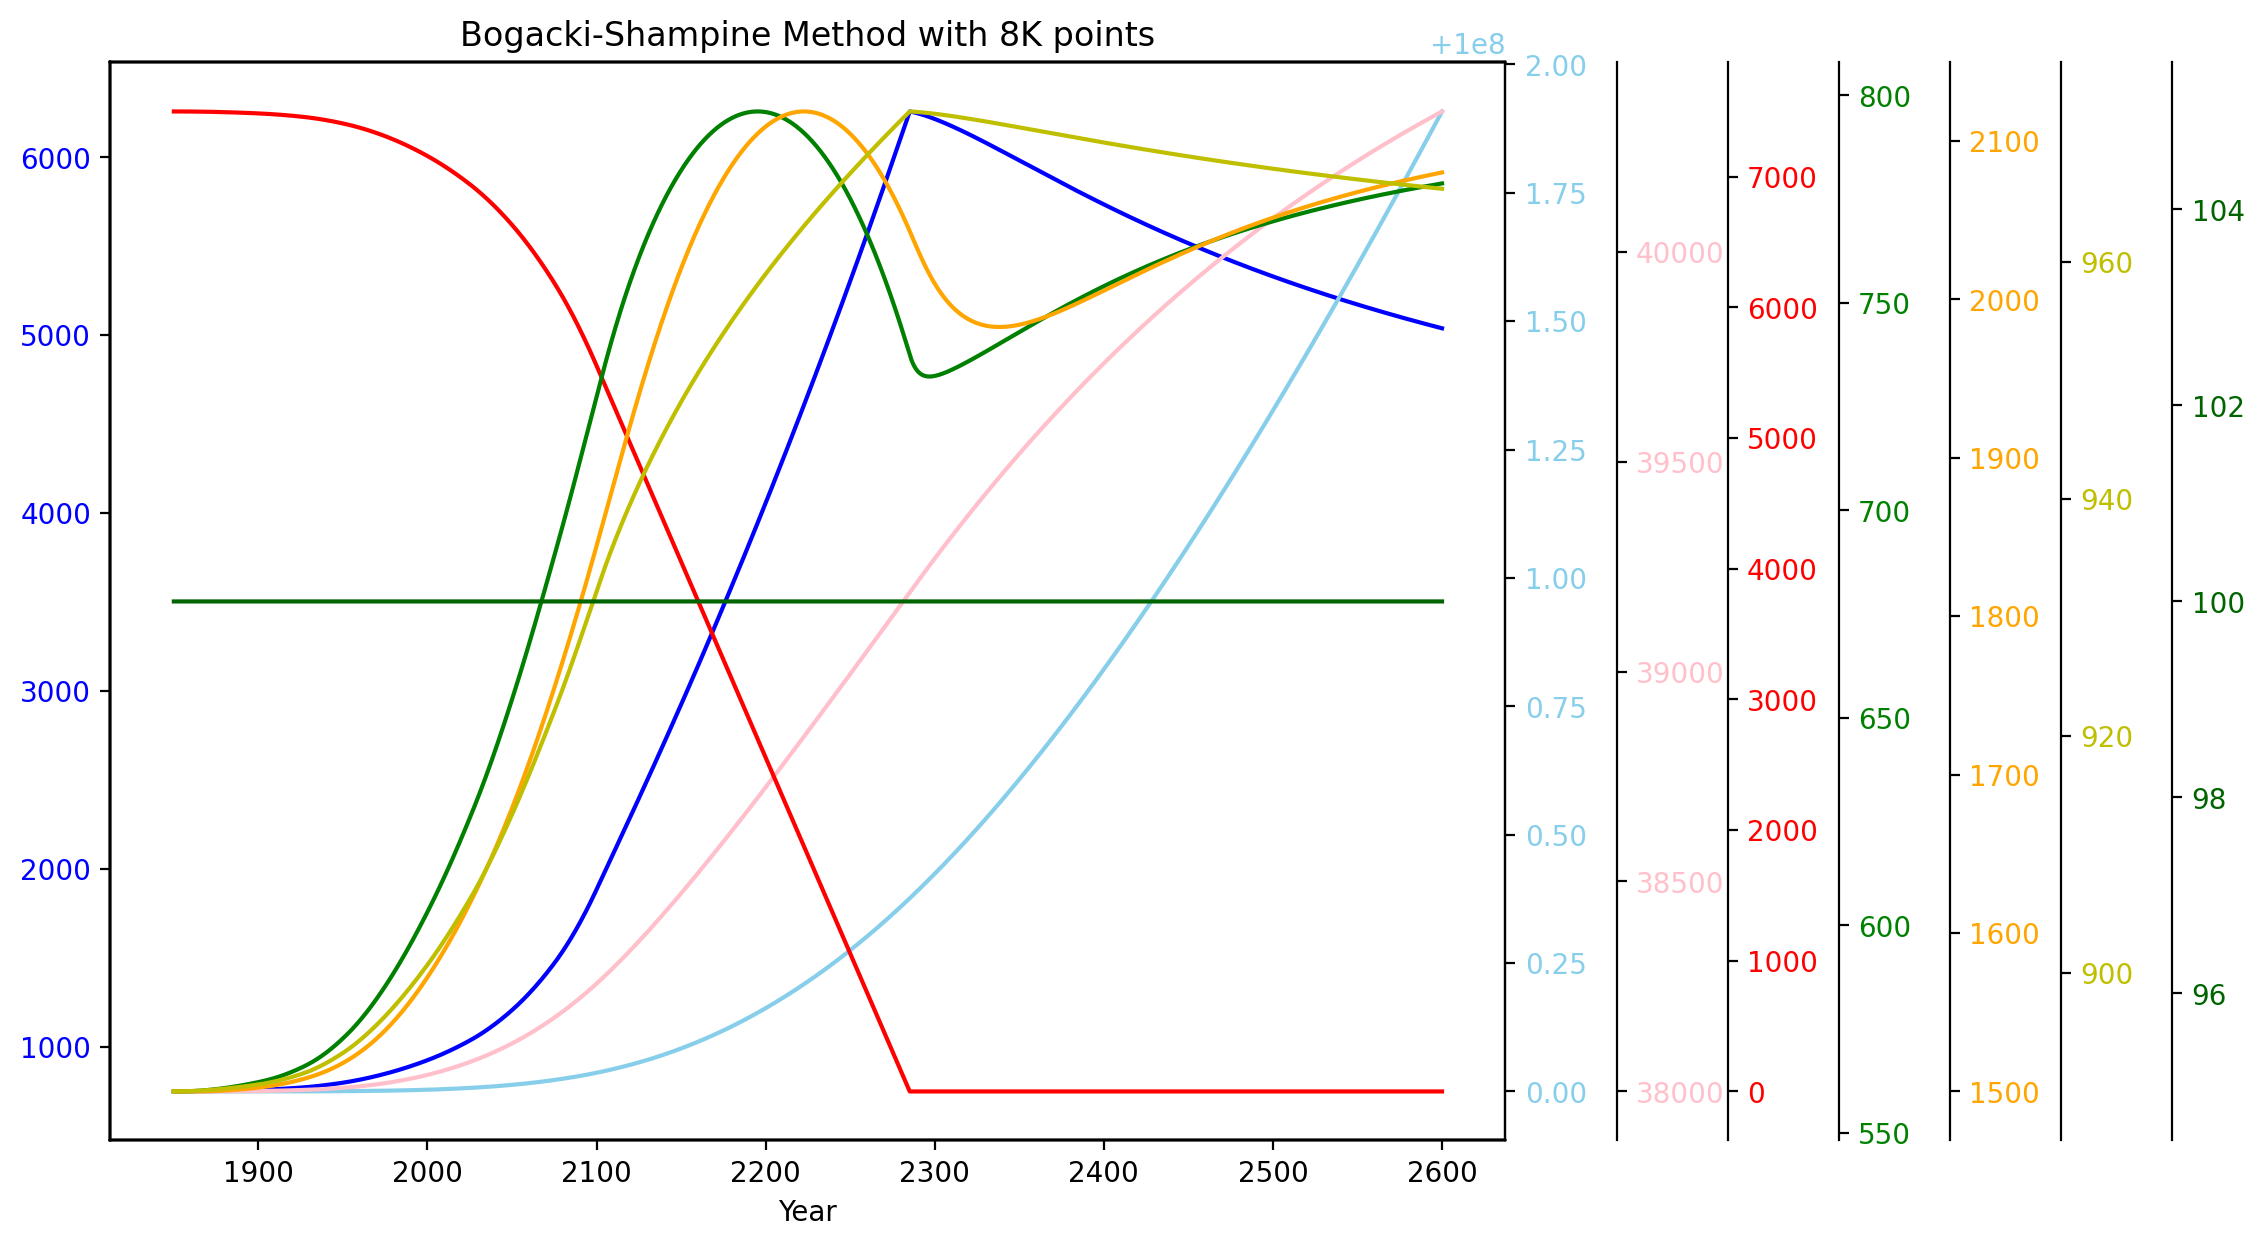

In [18]:
plots(times, y_BogackiShampine, True, True, "BogackiShampine_8K_error1e-6","Bogacki-Shampine Method with 8K points")

Now, that we have confirmed the IPCC results, let's simulate the temperature variation for the years to come.

### **4. Execution time comparison**
Here we're trying to have a better idea of how long a method takes to execute in our situation. Assuming the execution time is a random variable with a first moment (that would be the average we're looking for), then the law of large numbers gives that if we average the execution times over a big number of trials, this average convergence almost surely towards the expectation of the execution time.


In [19]:
def average_time(n_points, n_exe, method):
    """
    n_points : (int) number of points for the computation
    n_exe : (int) number of time measurements
    method : (string), either 'Euler', 'RK' or 'BS'.
    """
    points = np.linspace(1850, 2600, n_points)
    
    if method == 'Euler':
        f = lambda x: euler(derivative, points, x0)
    elif method == 'RK':
        f = lambda x: RungeKuttaq4(derivative, points, x0)
    elif method == 'BS':
        f = lambda x: BogackiShampine(derivative, points, x0, 1e-4)
    else:
        raise ValueError(f'method not implemented')
        
    start = time()
    for n in range(n_exe):
        f(0)
    stop = time()
    return (stop - start) / n_exe
        

In [20]:
n_exe = 50
for n_points in [2500, 3500, 5000]:
    print(f'for {n_points} points :')
    print(average_time(n_points, n_exe, 'Euler'))
    print(average_time(n_points, n_exe, 'RK'))
    print(average_time(n_points, n_exe, 'BS'))
    print ('\n')

for 2500 points :
0.05326906204223633
0.23182127475738526
0.28222486019134524


for 3500 points :
0.06268558502197266
0.29190744400024415
0.3322912740707398


for 5000 points :
0.12021858692169189
0.5284096717834472
0.29236416339874266




The B-S takes the same amount of time in all cases, whatever the number of points we specify since it uses an adaptative step size. The other two "classical methods" take more and more time to execute when the number of points increases or the step size decreases.

### **5. Simulation of temperature variation**

In [21]:
def temperature(years):
    x = RungeKuttaq4(derivative, years, x0)
    atmC02 = x[0]
    temp = GlobalTemp(atmC02)
    return temp

In [22]:
years = np.linspace(1850, 2600, 5000)
temp = temperature(years)
m = np.mean(temp)
print(m)

48.703394156131864


To check that the temperature is coherent, I've print the temperature between 2010 and 2020.

In [23]:
start_year = 2010
end_year = 2020

start_index = np.where(years >= start_year)[0][0]
end_index = np.where(years <= end_year)[0][-1]

temperature_between_2010_2020 = temp[start_index:end_index+1]
print("Temperature between 2010 and 2020: ", temperature_between_2010_2020)

# Temperature in 2024
print("Temperature in 2024: ", temp[np.where(years <= 2024)[0][-1]])


Temperature between 2010 and 2020:  [21.85447656 21.86087689 21.86729154 21.87372048 21.88016374 21.88662129
 21.89309315 21.8995793  21.90607975 21.9125945  21.91912355 21.92566689
 21.93222453 21.93879646 21.94538268 21.9519832  21.95859802 21.96522712
 21.97187053 21.97852823 21.98520023 21.99188652 21.99858711 22.00530201
 22.0120312  22.0187747  22.0255325  22.03230461 22.03909102 22.04589174
 22.05270678 22.05953613 22.06637979 22.07323778 22.08011008 22.08699671
 22.09389767 22.10081295 22.10774257 22.11468652 22.12164482 22.12861745
 22.13560444 22.14260577 22.14962145 22.15665149 22.1636959  22.17075466
 22.1778278  22.18491531 22.1920172  22.19913347 22.20626412 22.21340917
 22.22056861 22.22774245 22.2349307  22.24213336 22.24935043 22.25658193
 22.26382785 22.2710882  22.27836299 22.28565221 22.29295589 22.30027402
 22.30760661]
Temperature in 2024:  22.50334943112363


It corresponds to spring or summer temperatures and it seems coherent.

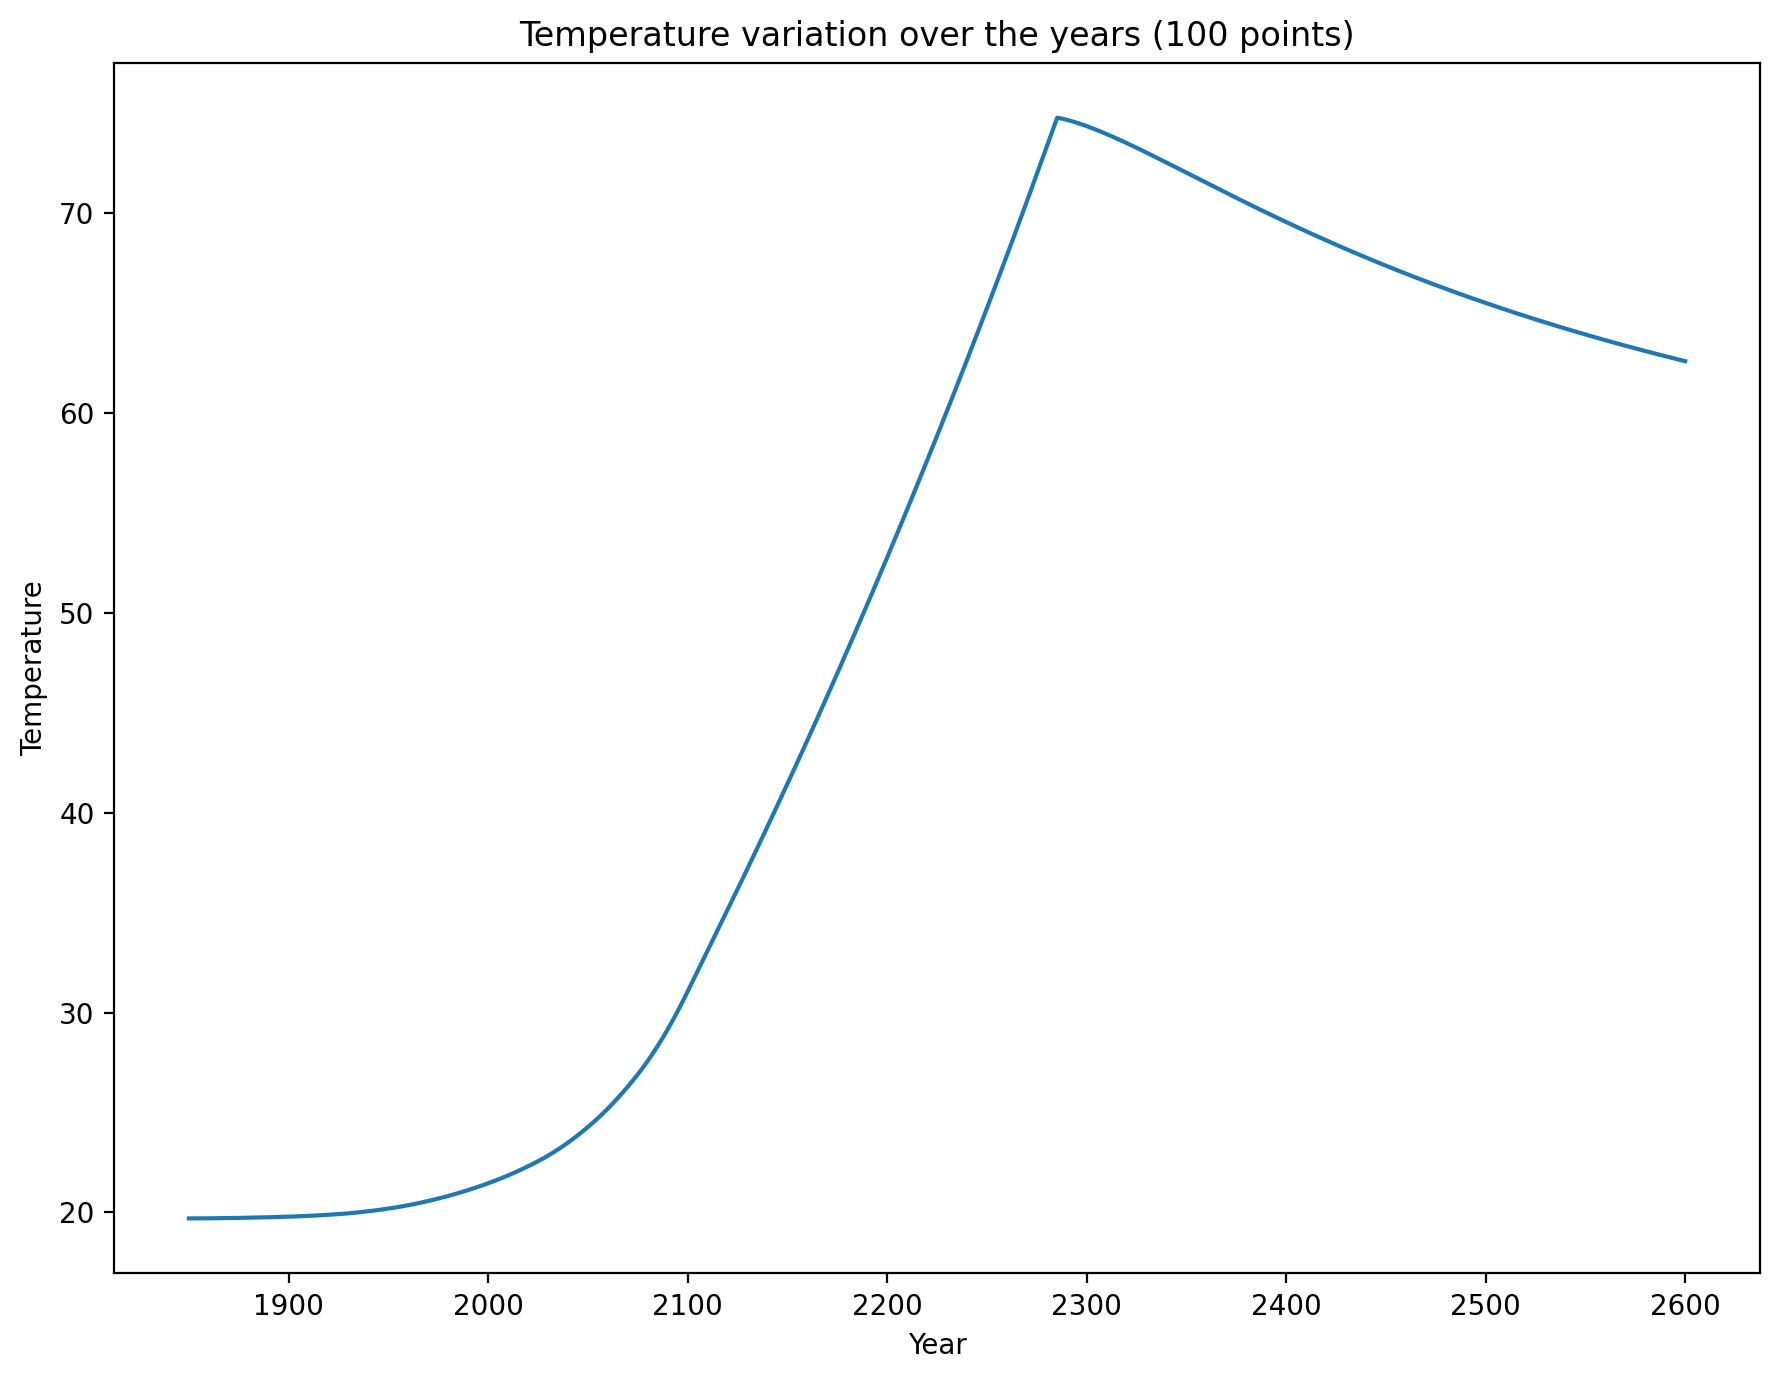

In [24]:
# Simulate the temperature variation for the years to come

plt.figure(figsize=(9, 7), dpi=200)
plt.plot(years, temp, label='Temperature variation')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Temperature variation over the years (100 points)')
plt.tight_layout()
plt.show()


### Observations

We observe that there is a growing tendency in the temperature variation. That's why Bibi the rabbit complains about being too hot. From this graph, we can even say that the temperature will attain a max temperature of more than 70°C around 2300, which is not viable for humans.

Therefore, we definitely need to change our carbon dioxyde emissions profile for Bibi to stop complaining.